<a href="https://colab.research.google.com/github/TabassumPatel4458/EDM-CAPSTON-PROJECT-1-Hotel-Booking-Analysis-/blob/main/Capstone_Project1_Individual_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Analysis**

We first decided to take up this project solely due to our diffrent point of views about hotel bookings and try to solve the problems and erros during making of individual colab.But when we downloaded the project we was shocked to see so many complex data in csv file.we had no idea what to do with them, how do we start to make our projetc with them,from where to start.Then we decided to divide the csv file with each team members(5 members) and first we all are worked individually and takes all the datas which is present in csv file by link and address of the csv file to the our individual project google colab notebook and doing some eda and other stuff we have done step by step and which we explain in below as follows.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_df = pd.read_csv("/content/Hotel Bookings.csv")

In [16]:
df1 =hotel_df.copy()

In [48]:
hotel_df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
# shape gives us number of rows and columns
hotel_df.shape

(119390, 32)

In [9]:
# Dataset Info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following step

1) Remove duplicate rows

2) Handling missing values.

3) Convert columns to appropriate datatypes.

4) Adding important columns

### <b> Step 1: Removing duplicate rows if any </b>

In [23]:
# Dataset Duplicate Value Count
hotel_df[hotel_df.duplicated()].shape

(0, 32)

In [24]:
# Dropping duplicate values
hotel_df.drop_duplicates(inplace = True)

In [25]:
hotel_df.shape

(87396, 32)

### <b> Step2: Handling missing values. </b>

In [26]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
hotel                     0
assigned_room_type        0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \
We will replace null values by 0 in these columns 

In [27]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [28]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \
So, 'nan' values are the missing values due to error of recording data. \
 \
We will replace the null values under this column with mean value of children.

In [29]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'.
This column represents the country of oriigin of customer. \
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [30]:
df1['country'].fillna('others', inplace = True)

In [31]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
previous_cancellations         0
reservation_status_date        0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [32]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 33)

In [33]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

#### Missing Values/Null Values

In [34]:
# Missing Values/Null Values Count

# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
previous_cancellations         0
reservation_status_date        0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
We will replace null values by 0 in these columns



In [35]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [36]:
df1['children'].unique()

array([ 0.        ,  1.        ,  2.        , 10.        ,  3.        ,
        0.13863969])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.

We will replace the null values under this column with mean value of children.

In [37]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer.
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [38]:
df1['country'].fillna('others', inplace = True)

In [39]:
# Visualizing the missing values

#Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False)[:6]


hotel                          0
previous_cancellations         0
reservation_status_date        0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.



In [40]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(0, 33)

In [41]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

### <b> Step 3: Converting columns to appropriate datatypes. </b>

In [42]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')


In [43]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

### <b> Step 4: Adding important columns. </b>

In [44]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

In [18]:
# Columns having missing values.
df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

### What did you know about your dataset?

Dataset Description:
hotel: Name of hotel ( City or Resort).

is_canceled: Whether the booking is canceled or not (0 for
no canceled and 1 for canceled).

lead_time: time (in days) between booking transaction and * actual arrival.

arrival_date_year: Year of arrival

arrival_date_month: month of arrival.

arrival_date_week_number: week number of arrival date.

arrival_date_day_of_month: Day of month of arrival date.

stays_in_weekend_nights: No. of weekend nights spent in a hotel.

stays_in_week_nights: No. of weeknights spent in a hotel.

adults: No. of adults in single booking record.

children: No. of children in single booking record.

babies: No. of babies in single booking record.

meal: Type of meal chosen.

country: Country of origin of customers (as mentioned by them).

market_segment: What segment via booking was made and for what purpose.

distribution_channel: Via which medium booking was made.

is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes).

previous_cancellations: No. of previous canceled bookings.

previous_bookings_not_canceled: No. of previous non-canceled bookings.

reserved_room_type: Room type reserved by a customer.

assigned_room_type: Room type assigned to the customer.

booking_changes: No. of booking changes done by customers.

deposit_type: Type of deposit at the time of making a
booking (No deposit/ Refundable/ No refund).

agent: Id of agent for booking.

company: Id of the company making a booking.

days_in_waiting_list: No. of days on waiting list.

customer_type: Type of customer(Transient, Group, etc.)

adr: Average Daily rate.

required_car_parking_spaces: No. of car parking asked in booking.

total_of_special_requests: total no. of special request.

reservation_status: Whether a customer has checked out or canceled,or not showed.

reservation_status_date: Date of making reservation status.




## ***Understanding our Variables***

In [50]:
# Dataset Columns
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 

1.first we understand the nature of dataset then take a variable called hotel_booking_df and apply a .columns property which returns the label of each column in the DataFrame were it fecthing all the csv data called hotel bookings and give output in the form of columns.

2.in other dataset we are using same variable known as hotel_booking_df and using .describe() method which returns description of the data in the DataFrame and it fecting all the csv data which is hotel bookings so that it give output in descriptive way.

### Check Unique Values for each variable.

In [52]:
# Check Unique Values for each variable.
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [53]:
df1['is_canceled'].unique()

array([0, 1])

In [54]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [55]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [56]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [57]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [58]:
df1['children'].unique()    # This column has 0 as well as null values

array([ 0,  1,  2, 10,  3])

# ***Data Wrangling***

## **What is percentage of bookings in each hotel?**

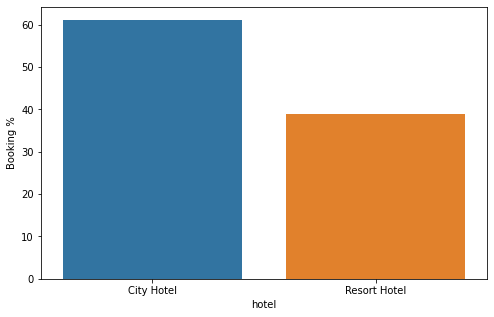

In [19]:
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

**percentage of booking in City Hotel is 60% and in Resort Hotel is 40%.**

 ## **What is preffered stay in each hotel?**

In [20]:
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

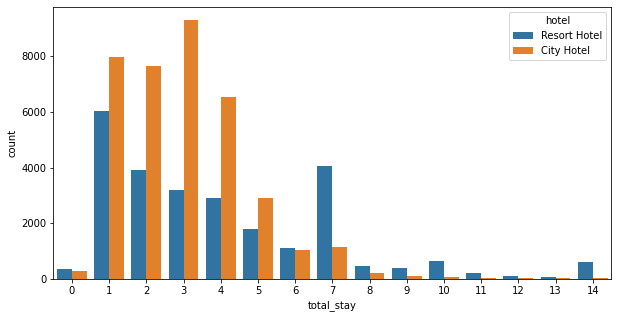

In [21]:
not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

**Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.**

#**Correlation Heatmap**

In [ ]:
# Correlation Heatmap visualization code

In [59]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


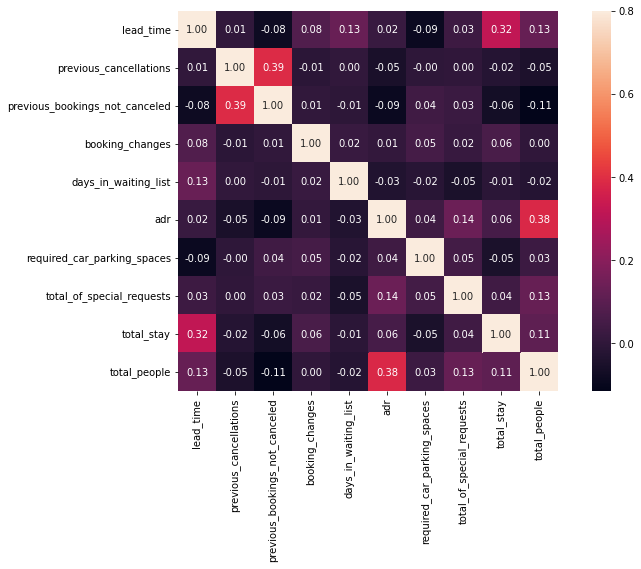

In [60]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

Lets see does length of stay affects the adr.




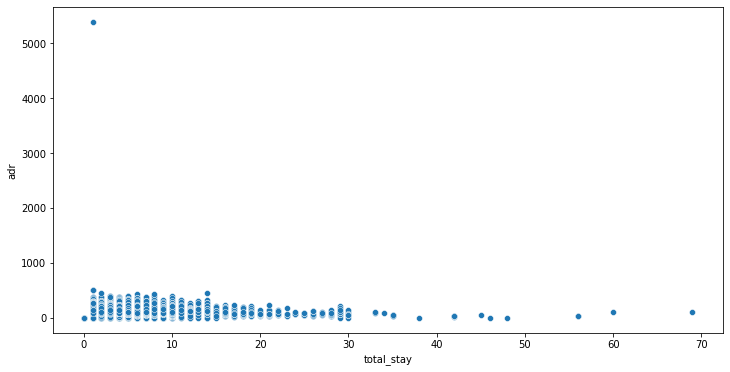

In [61]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [62]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

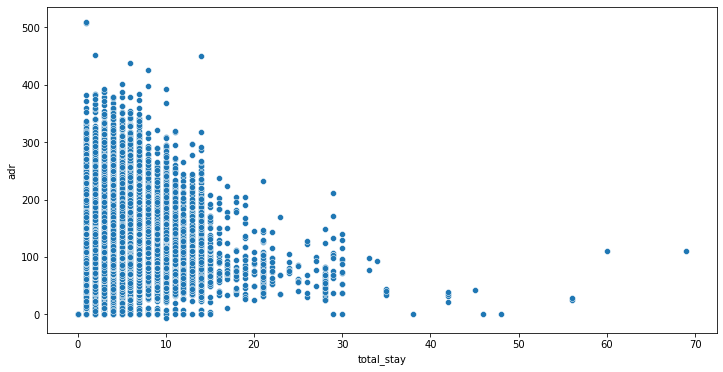

In [63]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.